In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [ ]:
# Data source: https://www.kaggle.com/datasets/sushobhitlutade/inventorysupply-chain-managementscm-superstore/data?select=Brand.csv
# US holiday 2004-2021 data: https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021?select=US+Holiday+Dates+%282004-2021%29.csv

### Load Datasets

In [3]:
#download data

# https://drive.google.com/file/d/1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7/view?usp=sharing
# https://drive.google.com/file/d/1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ/view?usp=sharing
# https://drive.google.com/file/d/1795kjXwfuOB4oPeYGo6JkY99N_B9c7bD/view?usp=sharing
# https://drive.google.com/file/d/1CloigwSXDXUziHdDN251G7oglNilVENI/view?usp=sharing
# https://drive.google.com/file/d/1nEYwmldDzSRZfK_Wa5v1lzhjI7LA43r5/view?usp=sharing
# https://drive.google.com/file/d/19IqVuxhMLZnj_LhNopEFf0kGlbg577J5/view?usp=sharing
# https://drive.google.com/file/d/1wFQTKwfvLRoxL0Ky7K4Yd2-jxUKs0IwK/view?usp=sharing

dwn_url='https://drive.google.com/uc?id='
# df_id = dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7"

df_trans = pd.read_csv(dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7") #transactions data
df_prod = pd.read_csv(dwn_url+"1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ") #products data
df_cat = pd.read_csv(dwn_url+"1795kjXwfuOB4oPeYGo6JkY99N_B9c7bD") #catagories data
df_bra = pd.read_csv(dwn_url+"1CloigwSXDXUziHdDN251G7oglNilVENI") #brand_has_product data
df_brad = pd.read_csv(dwn_url+"1nEYwmldDzSRZfK_Wa5v1lzhjI7LA43r5") #brands data
df_cust = pd.read_csv(dwn_url+"19IqVuxhMLZnj_LhNopEFf0kGlbg577J5") #customer data
df_holiday = pd.read_csv(dwn_url+"1wFQTKwfvLRoxL0Ky7K4Yd2-jxUKs0IwK") #US holiday dates

In [4]:
df_trans.head()

,Transaction_date,Quantity,Subtotal,Taxes,DiscountPrice,TotalAmount,Payment_Method,Products_ProductID,CustomerCart_CustomerID,Cashier_CashierID
0,2016-11-11,2,261.96,11.46,78.59,273.42,COD,FUR-BO-10001798,1,3
1,2016-11-11,3,512.36,22.42,153.71,534.77,COD,FUR-CH-10000454,1,3
2,2016-06-16,2,14.62,0.91,0.00,15.53,Debitcard,OFF-LA-10000240,2,3
3,2015-10-18,5,957.58,41.89,287.27,999.47,EMI,FUR-TA-10000577,3,3
4,2015-10-18,2,27.96,1.57,2.80,29.53,EMI,OFF-ST-10000760,3,3


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    Transaction_date         9994 non-null   object 
 1    Quantity                 9994 non-null   int64  
 2   Subtotal                  9994 non-null   float64
 3    Taxes                    9994 non-null   float64
 4    DiscountPrice            9994 non-null   float64
 5   TotalAmount               9994 non-null   float64
 6    Payment_Method           9994 non-null   object 
 7    Products_ProductID       9994 non-null   object 
 8    CustomerCart_CustomerID  9994 non-null   int64  
 9    Cashier_CashierID        9994 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 780.9+ KB


In [ ]:
df_trans.describe()

,Quantity,Subtotal,Taxes,DiscountPrice,TotalAmount,CustomerCart_CustomerID,Cashier_CashierID
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.789574,403.312545,21.610494,57.549893,424.922801,365.526816,1.944166
std,2.225110,1926.930347,113.157800,138.710447,2040.001009,223.396281,0.820583
min,1.000000,0.440000,0.030000,0.000000,0.470000,1.000000,1.000000
25%,2.000000,23.090000,1.390000,0.000000,24.487500,171.000000,1.000000
50%,3.000000,75.360000,4.240000,7.715000,79.600000,354.000000,2.000000
75%,5.000000,297.410000,14.472500,60.705000,312.280000,556.000000,3.000000
max,14.000000,135830.880000,8064.960000,6791.540000,143895.840000,793.000000,3.000000


In [ ]:
df_prod.head()

,ProductID,ProductName,ProductStock,Price,Discount,Category_CategoryID
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",11,825.174,15,1
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",12,241.960,15,1
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,17,136.784,30,1
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,28,48.580,10,1
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",15,212.940,15,1


In [ ]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             1862 non-null   object 
 1    ProductName          1862 non-null   object 
 2    ProductStock         1862 non-null   int64  
 3    Price                1862 non-null   float64
 4    Discount             1862 non-null   int64  
 5    Category_CategoryID  1862 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 87.4+ KB


In [ ]:
df_cat

,Category,SubCategory
0,Furniture,Bookcases
1,Furniture,Chairs
2,Office Supplies,Labels
3,Furniture,Tables
4,Office Supplies,Storage
5,Furniture,Furnishings
6,Office Supplies,Art
7,Technology,Phones
8,Office Supplies,Binders
9,Office Supplies,Appliances


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Category     17 non-null     object
 1    SubCategory  17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [ ]:
df_bra

,Brands_Brand_id,Products_ProductID
0,1,FUR-BO-10000112
1,1,FUR-BO-10000330
2,1,FUR-BO-10000362
3,1,FUR-BO-10000468
4,1,FUR-BO-10000711
...,...,...
3719,2,TEC-PH-10004912
3720,2,TEC-PH-10004922
3721,2,TEC-PH-10004924
3722,2,TEC-PH-10004959


In [ ]:
df_bra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brands_Brand_id     3724 non-null   int64 
 1   Products_ProductID  3724 non-null   object
dtypes: int64(1), object(1)
memory usage: 58.3+ KB


In [ ]:
df_brad

,Brand_Name
0,Superstore
1,Roche Bros


In [ ]:
df_cust.head()

,CustomerName,CustomerPhNo,CustomerAddress,Password
0,Claire Gute,9167035808,"Henderson,Kentucky,United States",NZ76S29
1,Darrin Van Huff,7495777225,"Los Angeles,California,United States",ND90W12
2,Sean O'Donnell,3795373234,"Fort Lauderdale,Florida,United States",NX38M64
3,Brosina Hoffman,6294416804,"Los Angeles,California,United States",NV88D78
4,Andrew Allen,3679518407,"Concord,North Carolina,United States",AE99W75


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    CustomerName     793 non-null    object
 1    CustomerPhNo     793 non-null    int64 
 2    CustomerAddress  793 non-null    object
 3    Password         793 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.9+ KB


In [ ]:
# thru 'CustomerAddress', we could know that the data is about transaction in the US.
df_cust[['City', 'States', 'Country']] = df_cust[' CustomerAddress'].str.split(',', expand=True)
df_cust.head()

,CustomerName,CustomerPhNo,CustomerAddress,Password,City,States,Country
0,Claire Gute,9167035808,"Henderson,Kentucky,United States",NZ76S29,Henderson,Kentucky,United States
1,Darrin Van Huff,7495777225,"Los Angeles,California,United States",ND90W12,Los Angeles,California,United States
2,Sean O'Donnell,3795373234,"Fort Lauderdale,Florida,United States",NX38M64,Fort Lauderdale,Florida,United States
3,Brosina Hoffman,6294416804,"Los Angeles,California,United States",NV88D78,Los Angeles,California,United States
4,Andrew Allen,3679518407,"Concord,North Carolina,United States",AE99W75,Concord,North Carolina,United States


In [ ]:
df_cust['Country'].value_counts()

Country
United States    793
Name: count, dtype: int64

In [ ]:
df_holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [ ]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [ ]:
#delete whitespaces on column tittles
df_trans.columns = [col.strip() for col in df_trans.columns]
df_prod.columns = [col.strip() for col in df_prod.columns]
df_cat.columns = [col.strip() for col in df_cat.columns]
df_bra.columns = [col.strip() for col in df_bra.columns]
df_brad.columns = [col.strip() for col in df_brad.columns]
df_cust.columns = [col.strip() for col in df_cust.columns]
df_holiday.columns = [col.strip() for col in df_holiday.columns]

#transforms date column to datetime format
df_trans["Transaction_date"] = pd.to_datetime(df_trans["Transaction_date"], format = "%Y-%m-%d")
df_holiday["Date"] = pd.to_datetime(df_holiday["Date"], format = "%Y-%m-%d")

### Exploratory Data Analysis

#### Q1: Brands - Do the 2 brands sell the same products?
Yes! But it doesn't add value to our final goal.

In [ ]:
df_bra.sort_values(by='Products_ProductID')

,Brands_Brand_id,Products_ProductID
0,1,FUR-BO-10000112
1862,2,FUR-BO-10000112
1,1,FUR-BO-10000330
1863,2,FUR-BO-10000330
2,1,FUR-BO-10000362
...,...,...
1859,1,TEC-PH-10004924
3722,2,TEC-PH-10004959
1860,1,TEC-PH-10004959
1861,1,TEC-PH-10004977


In [ ]:
df_brad

,Brand_Name
0,Superstore
1,Roche Bros


In [ ]:
df_trans.head()

,Transaction_date,Quantity,Subtotal,Taxes,DiscountPrice,TotalAmount,Payment_Method,Products_ProductID,CustomerCart_CustomerID,Cashier_CashierID
0,2016-11-11,2,261.96,11.46,78.59,273.42,COD,FUR-BO-10001798,1,3
1,2016-11-11,3,512.36,22.42,153.71,534.77,COD,FUR-CH-10000454,1,3
2,2016-06-16,2,14.62,0.91,0.00,15.53,Debitcard,OFF-LA-10000240,2,3
3,2015-10-18,5,957.58,41.89,287.27,999.47,EMI,FUR-TA-10000577,3,3
4,2015-10-18,2,27.96,1.57,2.80,29.53,EMI,OFF-ST-10000760,3,3


In [ ]:
df_prod.head()

,ProductID,ProductName,ProductStock,Price,Discount,Category_CategoryID
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",11,825.174,15,1
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",12,241.960,15,1
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,17,136.784,30,1
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,28,48.580,10,1
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",15,212.940,15,1


In [ ]:
df_bra.groupby(['Products_ProductID'])['Brands_Brand_id'].unique().reset_index()

,Products_ProductID,Brands_Brand_id
0,FUR-BO-10000112,"[1, 2]"
1,FUR-BO-10000330,"[1, 2]"
2,FUR-BO-10000362,"[1, 2]"
3,FUR-BO-10000468,"[1, 2]"
4,FUR-BO-10000711,"[1, 2]"
...,...,...
1857,TEC-PH-10004912,"[1, 2]"
1858,TEC-PH-10004922,"[1, 2]"
1859,TEC-PH-10004924,"[1, 2]"
1860,TEC-PH-10004959,"[1, 2]"


#### Q2: Transactions - what are the products that get sold the most? When does these get sold?
* Technology-Accessories
* Office-Paper
* Office-Binders
* Furniture-Chairs
* Furniture-Tables

In [ ]:
top_prods = df_trans.groupby(['Products_ProductID'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(11)

top_prods

,Products_ProductID,Quantity
1569,TEC-AC-10003832,75
1144,OFF-PA-10001970,70
694,OFF-BI-10001524,67
93,FUR-CH-10002647,64
721,OFF-BI-10002026,64
325,FUR-TA-10001095,61
1517,TEC-AC-10002049,60
835,OFF-BI-10004728,59
110,FUR-CH-10003774,59
1548,TEC-AC-10003038,57


In [ ]:
# df_cat.sort_values(by='Category')

In [ ]:
list_top_prods = df_trans[df_trans['Products_ProductID'].isin(top_prods['Products_ProductID'])]

list_top_prods

,Transaction_date,Quantity,Subtotal,Taxes,DiscountPrice,TotalAmount,Payment_Method,Products_ProductID,CustomerCart_CustomerID,Cashier_CashierID
235,2017-04-12,3,198.78,9.94,39.76,208.72,Debitcard,TEC-AC-10003832,38,1
251,2016-09-17,13,861.38,43.07,172.28,904.45,Debitcard,TEC-AC-10003832,111,2
330,2016-09-01,6,100.70,5.66,10.07,106.37,EMI,OFF-BI-10001524,139,2
350,2016-09-03,2,24.56,1.38,2.46,25.94,EMI,OFF-PA-10001970,145,2
352,2016-09-03,4,49.12,2.76,4.91,51.88,EMI,OFF-PA-10001970,145,2
...,...,...,...,...,...,...,...,...,...,...
9590,2014-05-15,9,140.62,7.91,14.06,148.53,Debitcard,OFF-BI-10002026,788,1
9683,2017-12-18,8,160.83,9.05,16.08,169.88,COD,FUR-FU-10001473,213,1
9776,2014-07-30,4,67.14,3.78,6.71,70.91,Credit card,OFF-BI-10001524,167,2
9828,2017-06-26,3,8.68,0.54,0.00,9.22,netbanking,OFF-BI-10004728,41,1


In [ ]:
list_top_prods.sort_values(by=['Products_ProductID', 'Transaction_date'])

,Transaction_date,Quantity,Subtotal,Taxes,DiscountPrice,TotalAmount,Payment_Method,Products_ProductID,CustomerCart_CustomerID,Cashier_CashierID
3841,2014-06-12,3,191.65,9.58,38.33,201.23,COD,FUR-CH-10002647,723,1
4779,2014-07-10,1,63.88,3.19,12.78,67.08,Credit card,FUR-CH-10002647,660,2
5254,2015-03-07,2,127.76,6.39,25.55,134.15,COD,FUR-CH-10002647,125,1
5709,2015-05-15,2,127.76,6.39,25.55,134.15,Debitcard,FUR-CH-10002647,509,2
799,2015-12-03,5,319.41,15.97,63.88,335.38,COD,FUR-CH-10002647,304,3
...,...,...,...,...,...,...,...,...,...,...
643,2017-06-15,4,265.04,13.25,53.01,278.29,EMI,TEC-AC-10003832,254,3
8734,2017-06-29,5,331.30,16.57,66.26,347.87,Credit card,TEC-AC-10003832,464,1
8586,2017-07-18,5,331.30,16.57,66.26,347.87,netbanking,TEC-AC-10003832,209,2
1653,2017-11-21,4,265.04,13.25,53.01,278.29,EMI,TEC-AC-10003832,513,3


To check transaction date range

In [ ]:
min(df_trans['Transaction_date']), max(df_trans['Transaction_date'])

(Timestamp('2014-01-07 00:00:00'), Timestamp('2018-01-05 00:00:00'))

#### After some exploratory, we decide to clean transaction data
* to delete unnecessary columns (Payment_Method, Customer_Cart, Cashier)
* to add some columns

In [ ]:
#delete unnecessary columns
df_trans = df_trans.drop(columns=['Payment_Method', 'CustomerCart_CustomerID','Cashier_CashierID'])

In [ ]:
#add columns to Transaction Table
df_trans['Cat-SubCat_ID']= df_trans['Products_ProductID'].str[:6]
df_trans['Cat_ID']= df_trans['Products_ProductID'].str[:3] #first 3 letters of Category ID
df_trans['SubCat_ID']= df_trans['Products_ProductID'].str[4:6] #first 2 letters of SubCategory ID
df_trans['Quarter'] = df_trans['Transaction_date'].dt.quarter
df_trans['Year']= df_trans['Transaction_date'].dt.year
df_trans['Month']= df_trans['Transaction_date'].dt.month
df_trans['Year-Month'] = df_trans['Transaction_date'].dt.to_period('M')
df_trans['Day_of_the_Week']= df_trans['Transaction_date'].dt.day_name()

In [ ]:
#create column for Units Sold
df_trans['Units_Sold'] = df_trans['Quantity']

#delete column named 'Quantity' for better column lableling/understanding
df_trans = df_trans.drop(columns=['Quantity'])

In [ ]:
df_trans.head()

,Transaction_date,Subtotal,Taxes,DiscountPrice,TotalAmount,Products_ProductID,Cat-SubCat_ID,Cat_ID,SubCat_ID,Quarter,Year,Month,Year-Month,Day_of_the_Week,Units_Sold
0,2016-11-11,261.96,11.46,78.59,273.42,FUR-BO-10001798,FUR-BO,FUR,BO,4,2016,11,2016-11,Friday,2
1,2016-11-11,512.36,22.42,153.71,534.77,FUR-CH-10000454,FUR-CH,FUR,CH,4,2016,11,2016-11,Friday,3
2,2016-06-16,14.62,0.91,0.00,15.53,OFF-LA-10000240,OFF-LA,OFF,LA,2,2016,6,2016-06,Thursday,2
3,2015-10-18,957.58,41.89,287.27,999.47,FUR-TA-10000577,FUR-TA,FUR,TA,4,2015,10,2015-10,Sunday,5
4,2015-10-18,27.96,1.57,2.80,29.53,OFF-ST-10000760,OFF-ST,OFF,ST,4,2015,10,2015-10,Sunday,2


Q3: Transactions - what are the subcatagories that get sold the most?
Let's aggregate the dataset to the "Subcatagory" and "Quantity" daily level so that we can have high volume metrics for demand forecasting throughout the country.

In [ ]:
df_subcat = df_trans.groupby(['Transaction_date','Cat-SubCat_ID']).agg({'Units_Sold':'sum'}).reset_index().sort_values(['Cat-SubCat_ID','Transaction_date'])
df_subcat

,Transaction_date,Cat-SubCat_ID,Units_Sold
18,2014-01-15,FUR-BO,4
27,2014-01-18,FUR-BO,3
35,2014-01-20,FUR-BO,5
53,2014-01-29,FUR-BO,2
59,2014-02-02,FUR-BO,2
...,...,...,...
6807,2017-12-28,TEC-PH,6
6816,2017-12-29,TEC-PH,2
6841,2018-01-02,TEC-PH,3
6846,2018-01-03,TEC-PH,7


<Figure size 5000x800 with 0 Axes>

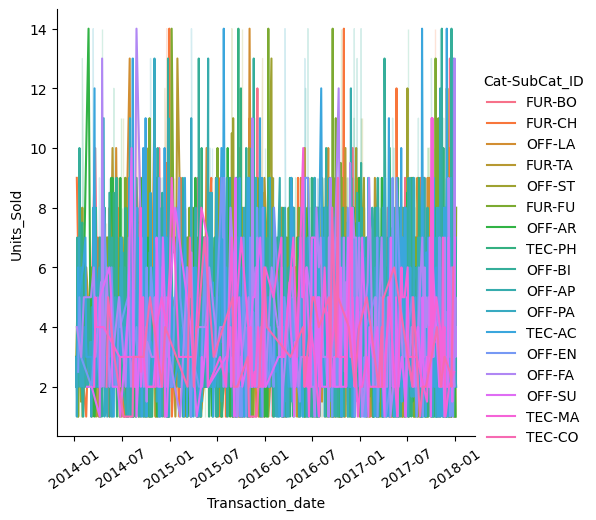

In [ ]:
# categories = df_trans['Cat-SubCat_ID'].unique()

plt.figure(figsize=(50, 8))

sns.relplot(
    data = df_trans,
    kind='line',
    x='Transaction_date',
    y='Units_Sold',
    hue='Cat-SubCat_ID'
    );
plt.tick_params(axis='x', rotation=35);

In [ ]:
unit_sold_df_subcat = df_subcat.pivot(index='Transaction_date',columns='Cat-SubCat_ID', values='Units_Sold')
unit_sold_df_subcat = unit_sold_df_subcat.fillna(0, inplace=False)
unit_sold_df_subcat.head()

Cat-SubCat_ID,FUR-BO,FUR-CH,FUR-FU,FUR-TA,OFF-AP,OFF-AR,OFF-BI,OFF-EN,OFF-FA,OFF-LA,OFF-PA,OFF-ST,OFF-SU,TEC-AC,TEC-CO,TEC-MA,TEC-PH
Transaction_date,,,,,,,,,,,,,,,,,
2014-01-07,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-08,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
2014-01-10,0.0,9.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
2014-01-12,0.0,0.0,3.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


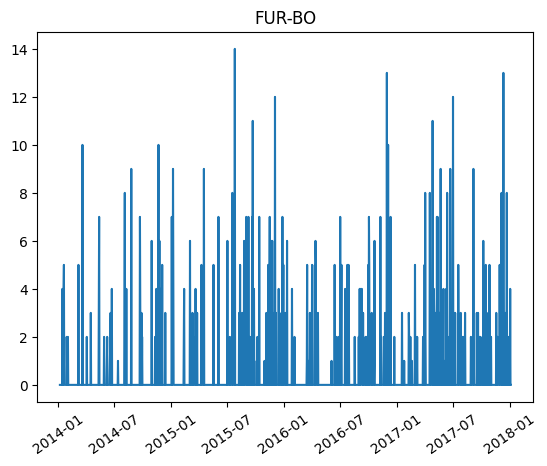

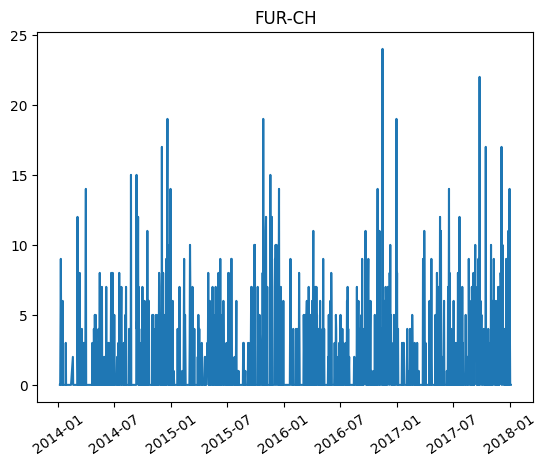

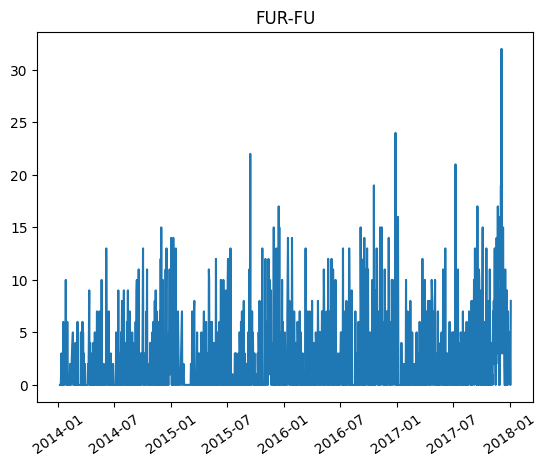

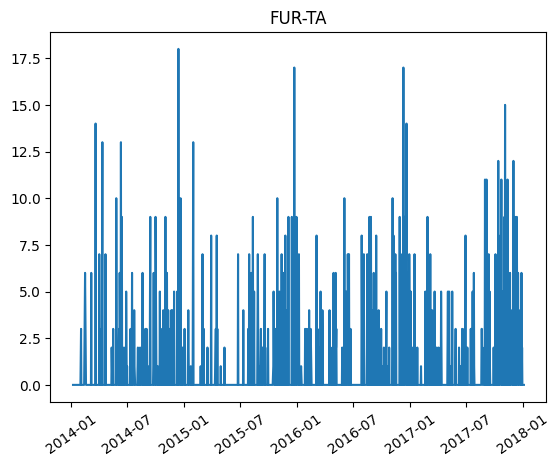

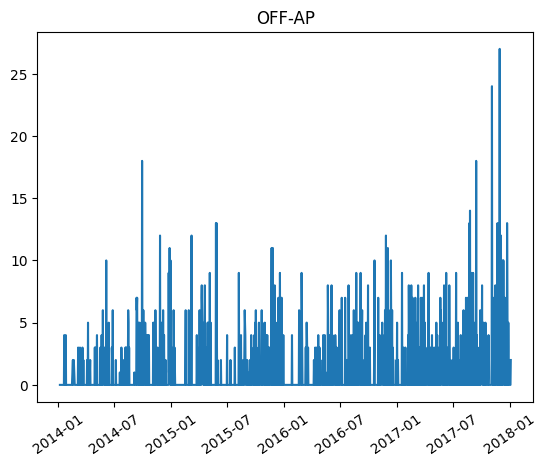

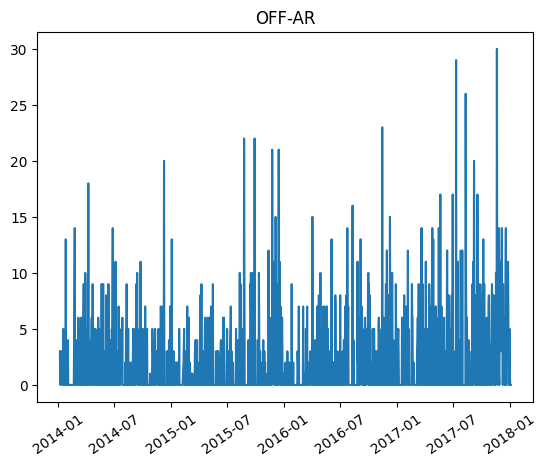

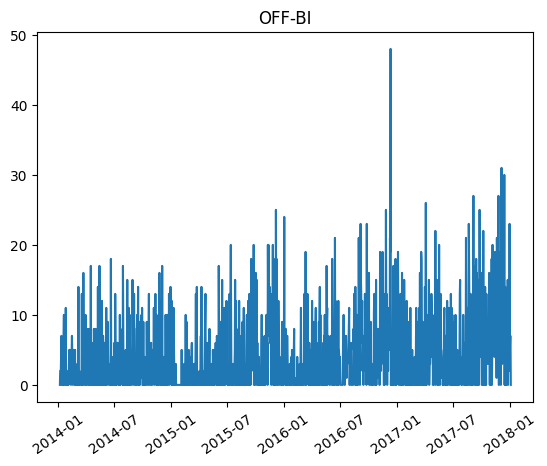

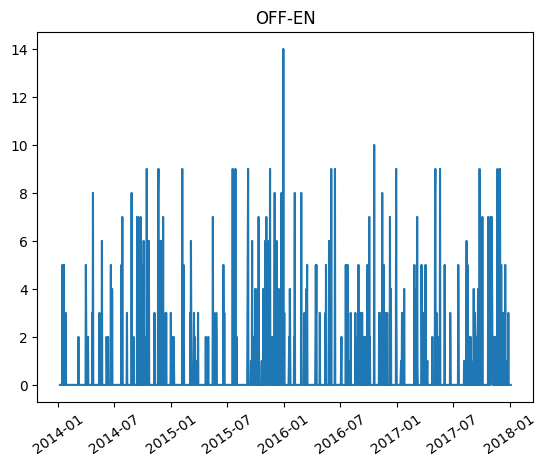

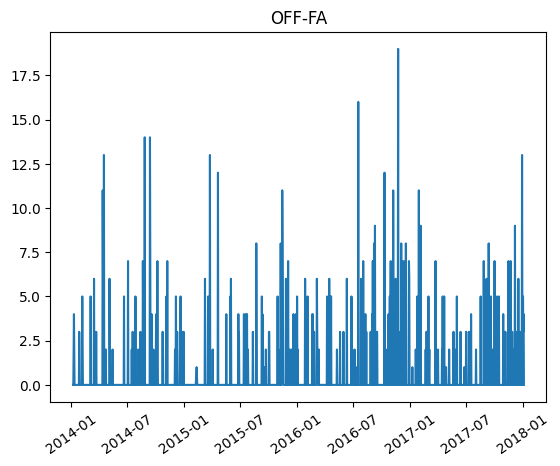

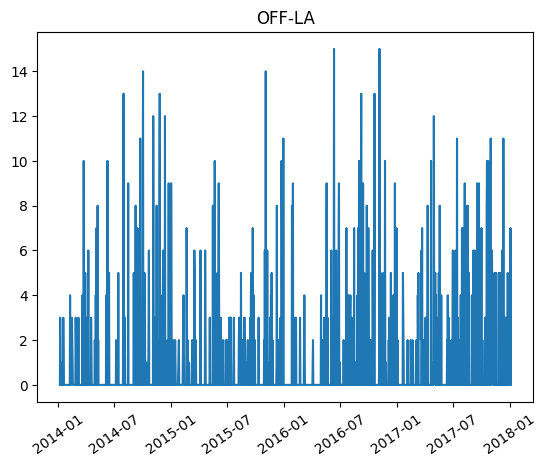

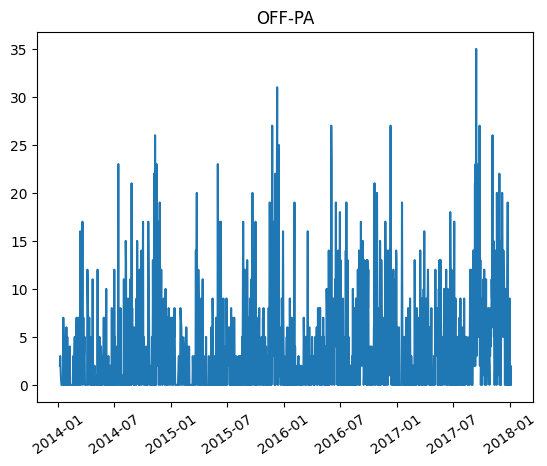

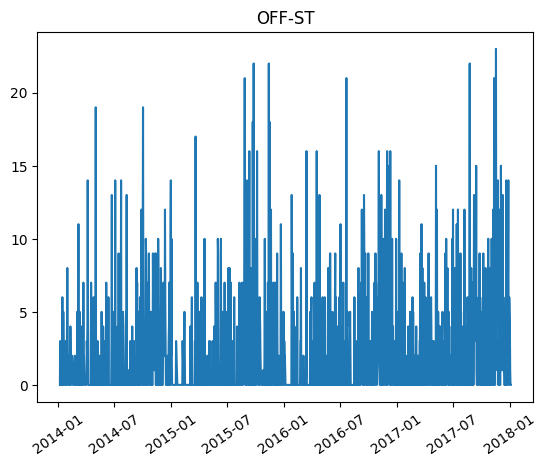

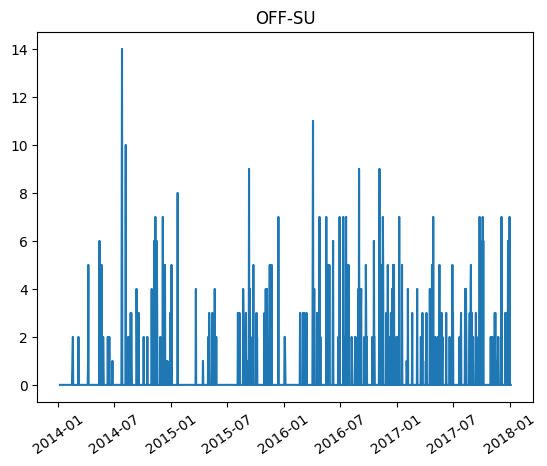

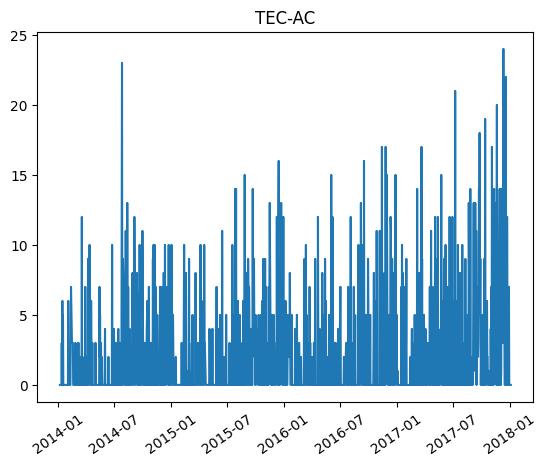

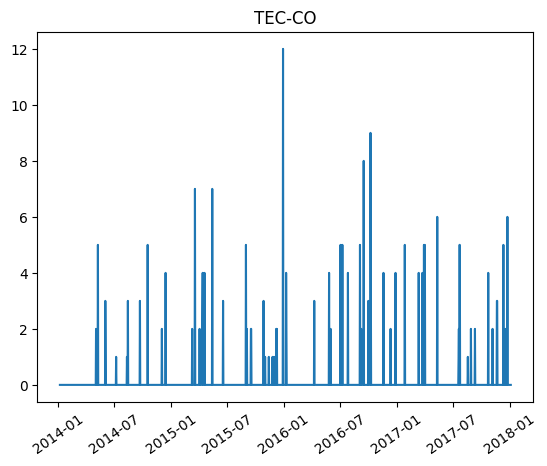

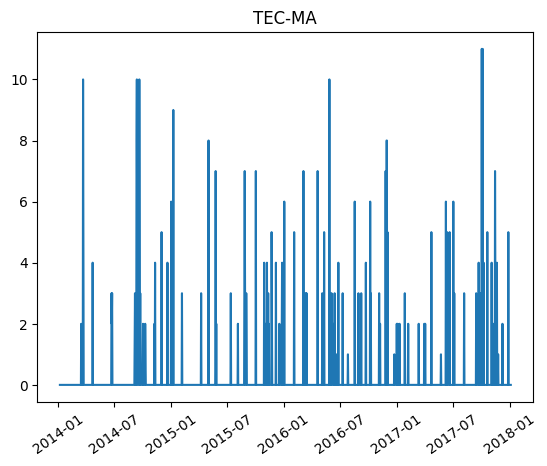

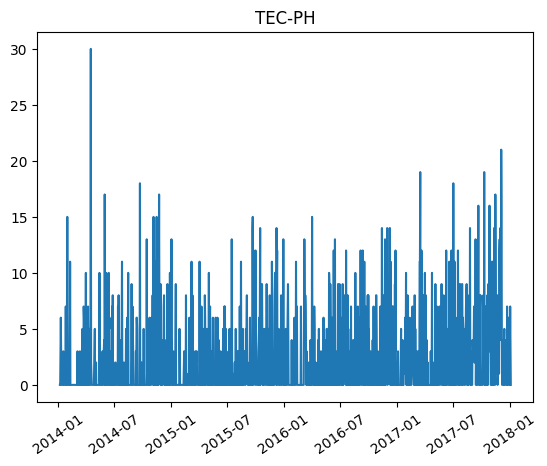

In [ ]:
for column in unit_sold_df_subcat.columns:
    plt.plot(unit_sold_df_subcat[column])
    plt.tick_params(axis='x', rotation=35)
    plt.title(column)
    plt.show()

#### Q3: Transactions, Holidays - Do holidays or weekends affect the sales?

I checked daily sales of all products

In [ ]:
# The dataset involves data of transactions made from 2014-01-07 to 2018-01-05.
df_trans.sort_values(by='Transaction_date')

In [ ]:
# Per dataset Customer_Cart['CustomerAddress'] we could know the data is for the US. So we found dataset of US holidays 2004-2021.
df_holiday

In [ ]:
# As the transaction data only involves 2014 to 2018, so we narrow the holiday dataset.
start_date = '2014-01-01'
end_date = '2018-12-31'

df_hld = df_holiday[(df_holiday['Date'] >= start_date) & (df_holiday['Date'] <= end_date)]

In [ ]:
df_hld

In [ ]:
#df_hld[df_hld['Date'] == '2016-11-11']

In [ ]:
# To add a column to check if the transaction is on holiday. firstly we have to rename the date column before merging.
df_trans.rename(columns = {'Transaction_date': 'Date'}, inplace=True)

In [ ]:
# Merge holiday data into transaction data
df_transactions = df_trans.merge(df_hld[['Date']], on=None, how='left', indicator=True)

# Check if the transaction is on holiday
df_transactions['is_holiday'] = df_transactions['_merge'] == 'both'

# Drop the '_merge' column
df_transactions.drop(columns=['_merge'], inplace=True)

In [ ]:
# add a column to check if the transaction is on weekends
df_transactions['is_weekend'] = df_transactions['Date'].dt.weekday >= 5

In [ ]:
df_transactions.head()

In [ ]:
# Aggregate quantity sales by date
daily_quan_sales = df_transactions.groupby('Date').agg({'Quantity': 'sum'}).reset_index()

# Merge holiday and weekend indicators
daily_quan_sales = daily_quan_sales.merge(df_transactions[['Date', 'is_weekend', 'is_holiday']].drop_duplicates(), on='Date', how='left')

In [ ]:
daily_quan_sales

In [ ]:
# Aggregate total income by sales by date
daily_inco_sales = df_transactions.groupby('Date').agg({'TotalAmount': 'sum'}).reset_index()

# Merge holiday and weekend indicators
daily_inco_sales = daily_inco_sales.merge(df_transactions[['Date', 'is_weekend', 'is_holiday']].drop_duplicates(), on='Date', how='left')

In [ ]:
daily_inco_sales

In [ ]:
daily_inco_sales.describe()

In [ ]:
# Plot daily quantity sales trend
plt.figure(figsize=(20, 6))
sns.lineplot(data=daily_quan_sales, x='Date', y='Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity Sales (Units)')
plt.title('Daily Quantity Sales Over Time')
plt.show()

# Plot daily income sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_inco_sales, x='Date', y='TotalAmount')
plt.xlabel('Date')
plt.ylabel('Price Sales (Units)')
plt.title('Daily Total Income by Sales Over Time')
plt.show()

# Boxplot for weekend vs weekday quantity sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='Quantity', data=daily_quan_sales)
plt.title('Weekend vs Weekday Quantity Sales')
plt.show()

# Boxplot for weekend vs weekday income by sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='TotalAmount', data=daily_inco_sales)
plt.title('Weekend vs Weekday Total Income Sales')
plt.show()

# Boxplot for holiday vs non-holiday quantity sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_holiday', y='Quantity', data=daily_quan_sales)
plt.title('Holiday vs Non-holiday Quantity Sales')
plt.show()

# Boxplot for holiday vs non-holiday price sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_holiday', y='TotalAmount', data=daily_inco_sales)
plt.title('Holiday vs Non-holiday Total Income Sales')
plt.show()

#### Q4: How did products get sold by Weekend vs Weekday vs holidays?

In [ ]:
df_transactions.head()

In [ ]:
prod_sales_sum = df_transactions.groupby(['Products_ProductID', 'is_weekend', 'is_holiday']).agg({'Quantity': 'sum'}).reset_index()
prod_sales_mean = df_transactions.groupby(['Products_ProductID', 'is_weekend', 'is_holiday']).agg({'Quantity': 'mean'}).reset_index()

In [ ]:
prod_sales_mean

In [ ]:
prod_weekend_sales = prod_sales_sum[prod_sales_sum['is_weekend'] == True]
prod_weekday_sales = prod_sales_sum[prod_sales_sum['is_weekend'] == False]
prod_holiday_sales = prod_sales_sum[prod_sales_sum['is_holiday'] == True]
prod_non_holiday_sales = prod_sales_sum[prod_sales_sum['is_holiday'] == False]

In [ ]:
# Average sales by product during weekends vs. weekdays
avg_prod_sales_weekend_vs_weekday = df_transactions.groupby(['Products_ProductID', 'is_weekend']).agg({'Quantity': 'mean'}).reset_index()

# Plot average sales by product for weekends vs. weekdays
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='Quantity', data=avg_prod_sales_weekend_vs_weekday)
plt.title('Average Sales by Product: Weekends vs. Weekdays')
plt.xlabel('Is Weekend')
plt.ylabel('Average Sales')
plt.show()